## [教學重點]

學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]

觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?


## import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
diabetes.data[:, np.newaxis]

array([[[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613]],

       [[-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405]],

       [[ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034]],

       ...,

       [[ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073]],

       [[-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034]],

       [[-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]])

## np.newaxis 在使用和功能上等價於 None

### 1. np.newaxis 的應用

In [4]:
np.newaxis == None

True

In [5]:
np.arange(3)

array([0, 1, 2])

In [6]:
np.arange(3)[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [7]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2] #對照上面之後發現，X就是0,1,2 column2的那欄(那個feature)啦
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

## [利用numpy的newaxis轉變矩陣的形狀](http://ben-do.github.io/2016/09/15/change-shape-of-matrix-by-numpy/)

有一個一維陣列x1，我分別想要把它變成一個3*1的矩陣x2，以及1*3的矩陣x3，作法如下。

In [8]:
x1 = np.array([10, 20, 30], float)
print("shape of x1 is ", x1.shape)
print(x1, "\n")

x2 = x1[:, np.newaxis]
print("shape of x2 is ", x2.shape)
print(x2, "\n")

x3 = x1[np.newaxis, :]
print("shape of x3 is ", x3.shape)
print(x3, "\n")


shape of x1 is  (3,)
[10. 20. 30.] 

shape of x2 is  (3, 1)
[[10.]
 [20.]
 [30.]] 

shape of x3 is  (1, 3)
[[10. 20. 30.]] 



## Linear regssion

In [9]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)


Data shape:  (442, 1)


In [10]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


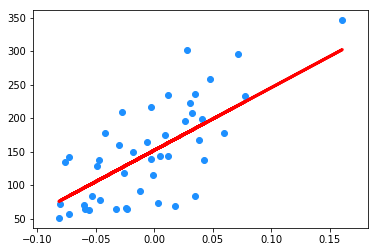

In [11]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test, color = 'dodgerblue')
plt.plot(x_test, y_pred, color = 'red', linewidth = 3)
plt.show()

## Logistics regression

In [12]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

In [13]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8666666666666667


## [作業重點]

了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間

試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [14]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

## HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，再使用正確的模型訓練！

In [15]:
display(wine.target[0:5]) # logistic reg
display(boston.target[0:5]) # linear reg
display(breast_cancer.target[0:5]) # logistic reg

array([0, 0, 0, 0, 0])

array([24. , 21.6, 34.7, 33.4, 36.2])

array([0, 0, 0, 0, 0])

## boston

In [16]:
# 讀取 boston 資料集 - linear reg
boston = datasets.load_boston()

print('target y : %s \n' % boston.target[0:5])
print('shape:\n', boston.data.shape)
print('\nfeature name:\n', boston.feature_names)


# # 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# X = boston.data[:, np.newaxis, 2]
# print("Data shape: ", X.shape) # 我們取出的其中一個 feature

# 上述範例是為了視覺化方便只取1個feature，這次用所有feature
X = boston.data
y = boston.target

# train test split - 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)

# model - 建立一個線性回歸模型
reg = linear_model.LinearRegression()

# fit (train model) - 將訓練資料丟進去模型訓練
reg.fit(X_train, y_train)
# cross validation
print(f'\n c.v. score : {cross_val_score(reg, X_train, y_train, cv=5).mean()}\n')

# predict - 將測試資料丟進模型得到預測結果
y_pred = reg.predict(X_test)


# 可以看回歸模型的參數值
print('Coefficients: %s \n'% reg.coef_)

# evaluation - 預測值與實際值的差距，使用 MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)



# # 畫出回歸模型與實際資料的分佈
# plt.scatter(X_test, y_test, color = 'dodgerblue')
# plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
# plt.show()

target y : [24.  21.6 34.7 33.4 36.2] 

shape:
 (506, 13)

feature name:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

 c.v. score : 0.6796744375539973

Coefficients: [-1.39098133e-01  3.97316638e-02  1.56281579e-02  2.23420723e+00
 -1.73650287e+01  3.81367677e+00  4.13297396e-06 -1.32562522e+00
  3.00934394e-01 -1.04274363e-02 -9.69146963e-01  8.59336770e-03
 -5.28261221e-01] 

MSE: 26.57


## wine

In [17]:
# 讀取 wine 資料集 - logistic reg
wine = datasets.load_wine()

print('target y : %s \n' % wine.target[0:5])
print('shape:\n', wine.data.shape)
print('\nfeature name:\n', wine.feature_names)
print('\ntarget names:\n', wine.target_names)

# # 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# X = wine.data[:, np.newaxis, 2]
# print("Data shape: ", X.shape) # 我們取出的其中一個 feature

# 上述範例是為了視覺化方便只取1個feature，這次用所有feature
X = wine.data
y = wine.target

# train test split - 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)

# model - 建立一個線性回歸模型
logistic_reg = linear_model.LogisticRegression() # C = 0.1, 0.01, 0.0001

# fit (train model) - 將訓練資料丟進去模型訓練
logistic_reg.fit(X_train, y_train)
# cross validation
print(f'\n c.v. score : {cross_val_score(logistic_reg, X_train, y_train, cv=5).mean()}\n')

# predict - 將測試資料丟進模型得到預測結果
y_pred = logistic_reg.predict(X_test)



# evaluation - 預測值與實際值的差距，使用 Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)



# # 畫出回歸模型與實際資料的分佈
# plt.scatter(X_test, y_test, color = 'dodgerblue')
# plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
# plt.show()

target y : [0 0 0 0 0] 

shape:
 (178, 13)

feature name:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

target names:
 ['class_0' 'class_1' 'class_2']

 c.v. score : 0.9682274247491639

Accuracy:  0.9629629629629629


## breast_cancer

In [18]:
# 讀取 breast_cancer 資料集 - logistic reg
breast_cancer = datasets.load_breast_cancer()

print('target y : %s \n' % breast_cancer.target[0:5])
print('shape:\n', breast_cancer.data.shape)
print('\nfeature name:\n', breast_cancer.feature_names)
print('\ntarget names:\n', breast_cancer.target_names)

# # 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
# X = breast_cancer.data[:, np.newaxis, 2]
# print("Data shape: ", X.shape) # 我們取出的其中一個 feature

# 上述範例是為了視覺化方便只取1個feature，這次用所有feature
X = breast_cancer.data
y = breast_cancer.target

# train test split - 切分訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 87)

# model - 建立一個線性回歸模型
logistic_reg = linear_model.LogisticRegression() # C = 0.1, 0.01, 0.0001

# fit (train model) - 將訓練資料丟進去模型訓練
logistic_reg.fit(X_train, y_train)
# cross validation
print(f'\n c.v. score : {cross_val_score(logistic_reg, X_train, y_train, cv=5).mean()}\n')

# predict - 將測試資料丟進模型得到預測結果
y_pred = logistic_reg.predict(X_test)



# evaluation - 預測值與實際值的差距，使用 Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)



# # 畫出回歸模型與實際資料的分佈
# plt.scatter(X_test, y_test, color = 'dodgerblue')
# plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
# plt.show()

target y : [0 0 0 0 0] 

shape:
 (569, 30)

feature name:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

target names:
 ['malignant' 'benign']

 c.v. score : 0.9498076923076922

Accuracy:  0.9415204678362573


## 參考資料

## [超多 Linear Regression / Logistic Regression 的 examples](https://github.com/trekhleb/homemade-machine-learning)

![img](https://github.com/trekhleb/homemade-machine-learning/blob/master/images/machine-learning-map.png?raw=true)

## [深入了解 multinomial Logistic Regression 的原理](http://dataaspirant.com/2017/05/15/implement-multinomial-logistic-regression-python/)


- #### [HOW THE LOGISTIC REGRESSION MODEL WORKS](https://dataaspirant.com/2017/03/02/how-logistic-regression-model-works/)

![img2](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2016/04/logisticregression.png?w=800&ssl=1)

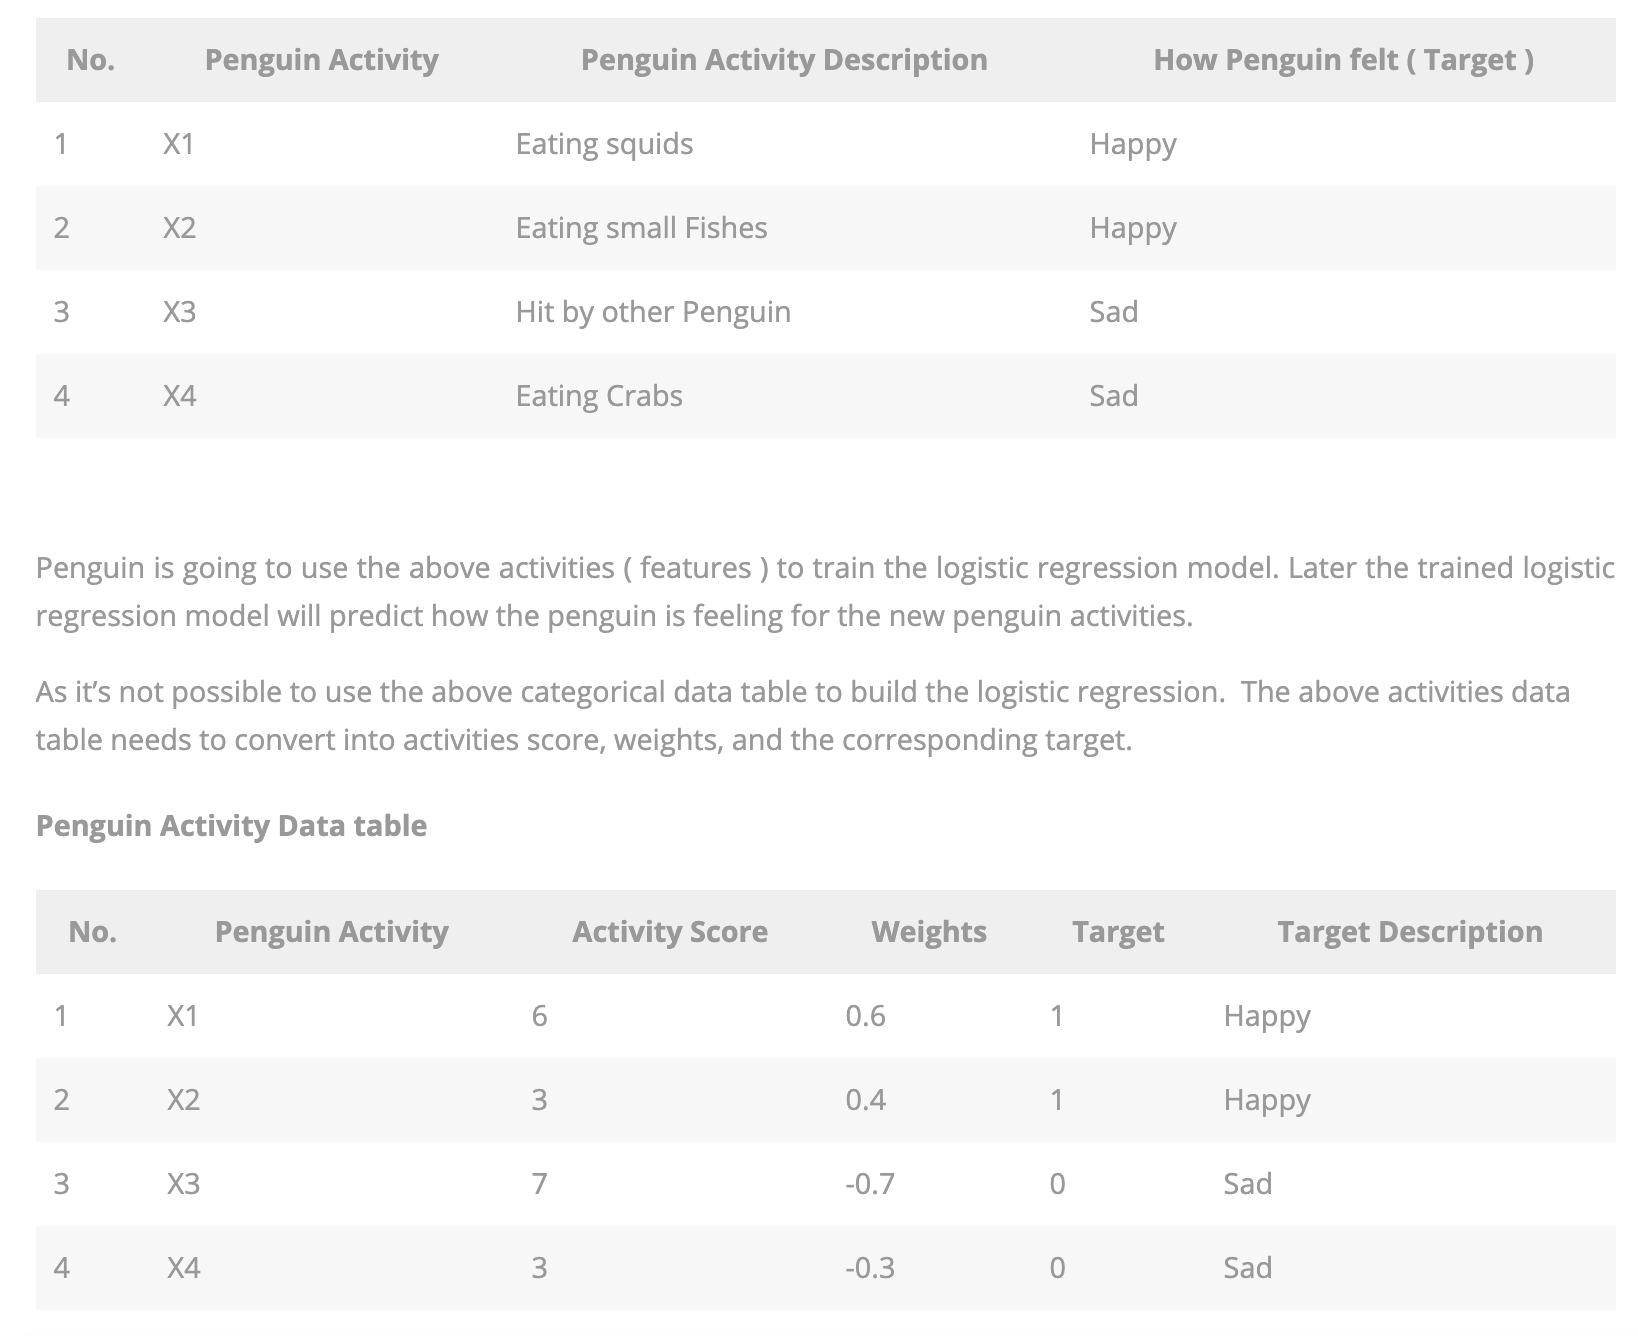